# Boolean generator 1 (version 1):

Generating sentences of the form

- 1) **A, not A** (contradiction)
- 2) **not A, A** (contradiction)
- 3) **A, not B** (non-contradiction)
- 4) ** not B, A ** (non-contradiction)





In [6]:
import numpy as np
import pandas as pd
from word_lists import name_list, positive_personality_list
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline


### Generating all combinations between names and predicates

In [7]:
boolean_iter = itertools.product(name_list, positive_personality_list)
boolean_list = list(boolean_iter)

print("The total number of combinations between names and predicates is {}".format(len(boolean_list)))

The total number of combinations between names and predicates is 33396


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [8]:
positives = []
negatives = []

for car, cdr in boolean_list:
    positive = "{} is {}".format(car, cdr)
    negative = "{} is not {}".format(car, cdr)
    positives.append(positive)
    negatives.append(negative)
    
both = list(zip(positives, negatives))

np.random.shuffle(both)

sentence_1 = []
sentence_2 = []
label = []

for i in range(11000):
    if i % 2 ==0:
        sentence_1.append(both[i][0])
        sentence_2.append(both[i][1])
        label.append(1)
    else:
        sentence_1.append(both[i][0])
        new_i = i
        while new_i == i:
            new_i = np.random.randint(0, len(both))
        sentence_2.append(both[new_i][1])
        label.append(0)
        
df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()    

,sentence1,sentence2,label
10995,Stanford is gentle,Stanford is not gentle,1
10996,Gracie is agreeable,Gracie is not agreeable,1
10997,Byrd is calm,Byrd is not calm,1
10998,Finch is lively,Finch is not lively,1
10999,Huntley is agreeable,Huntley is not agreeable,1


#### Looking at the label distribution

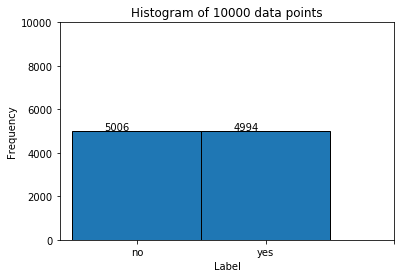

In [4]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "b1_train.png")

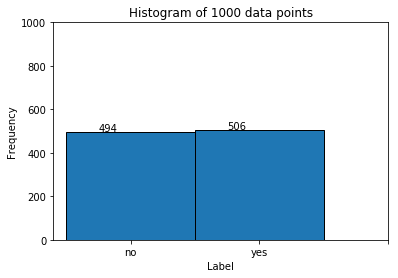

In [5]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "b1_test.png")

### Saving to CSV

In [20]:
df_train.to_csv("b1_v1_train.csv", index=False)
df_test.to_csv("b1_v1_test.csv", index=False)